# Dynamic Foucault Simulations

**Scott Prahl**

**Dec 2025**

In [1]:
%config InlineBackend.figure_format = 'retina'
# %matplotlib widget

import sys
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

if sys.platform == "emscripten":
    import piplite

    await piplite.install("lenstest")

from lenstest import foucault, ronchi

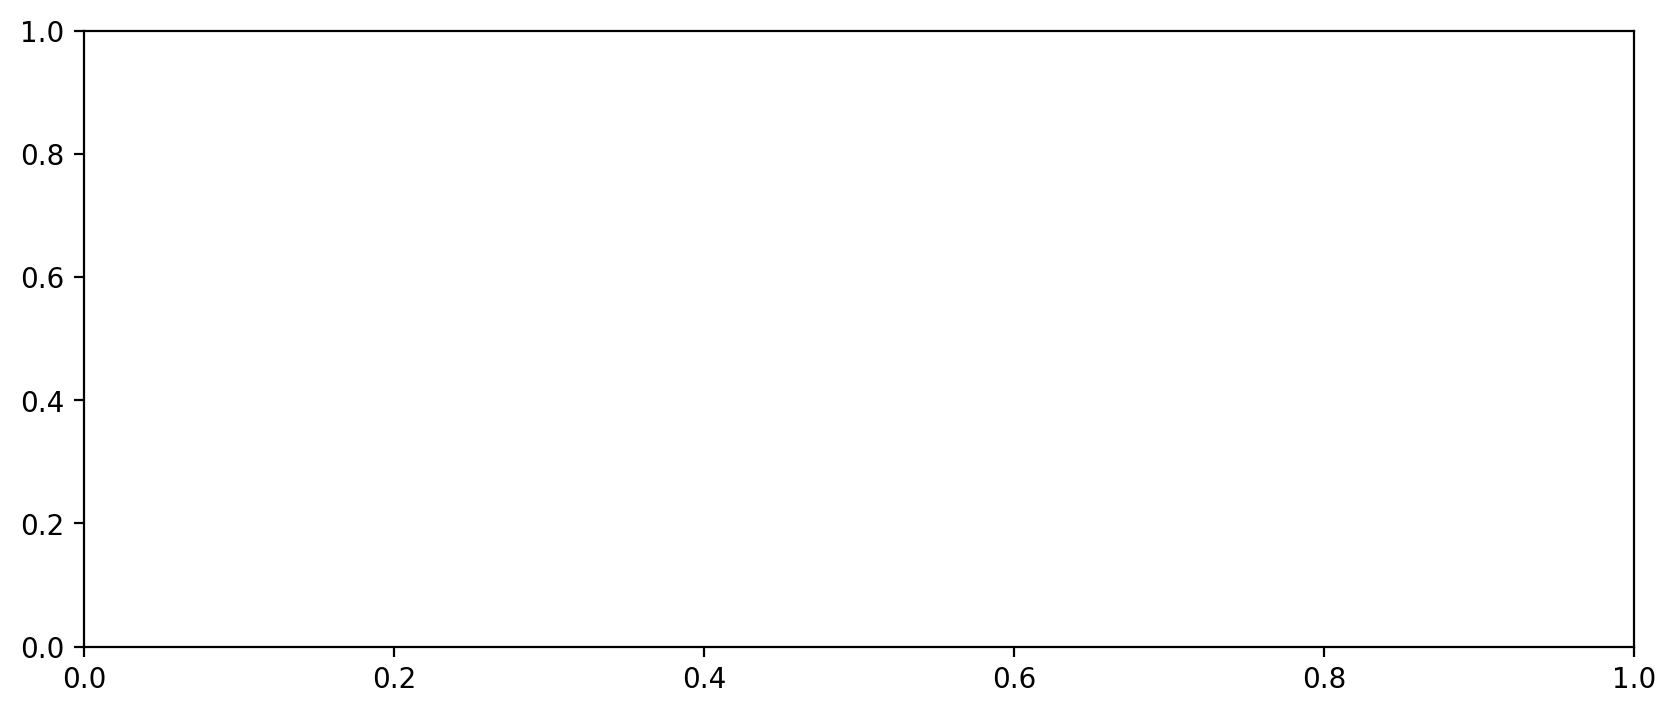

interactive(children=(FloatSlider(value=0.0, description='conic', max=1.0, min=-1.0, step=0.02), FloatSlider(v…

In [2]:
D = 20 * 25.4
z_offset = 2
x_offset = -0.03
conic = 1
phi = 0

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 1, 1)


def update(conic=0, x_offset=20, z_offset=2, RoC=D):
    """Called once for each update."""
    fig.clear()
    foucault.plot_knife_and_screen(D, RoC, x_offset, z_offset, conic, phi=phi, init=False)
    fig.canvas.draw_idle()


ipywidgets.interact(
    update, RoC=(D, 1000, 100), conic=(-1, 1, 0.02), x_offset=(-0.2, 0.2, 0.02), z_offset=(-5, 5, 0.1)
);

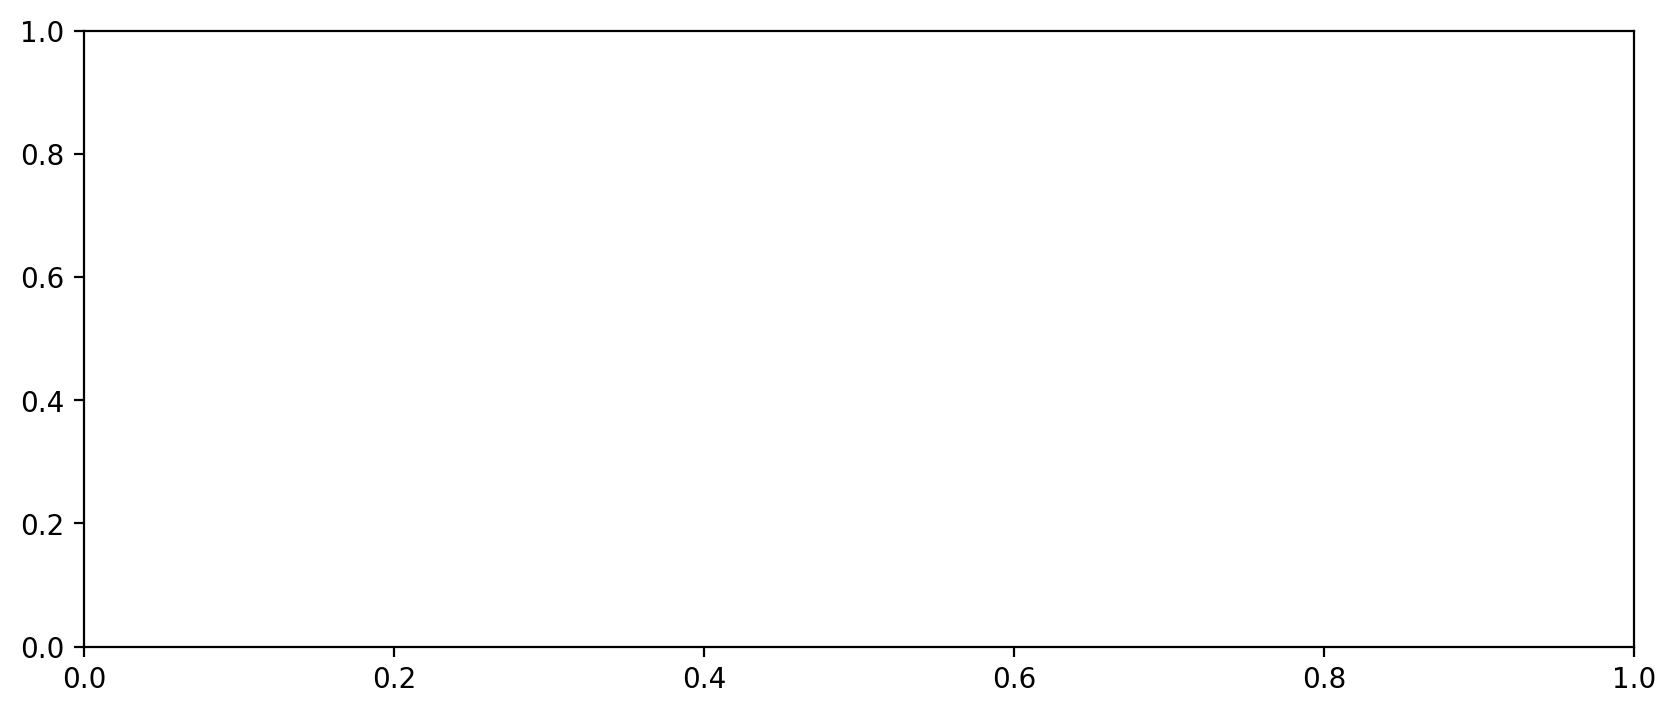

interactive(children=(FloatSlider(value=0.0, description='conic', max=1.0, min=-1.0, step=0.02), FloatSlider(v…

<function __main__.update(conic=0.0, x_offset=-0.03, z_offset=2.0, RoC=508.0)>

In [5]:
D = 20 * 25.4
phi = 0

fig, ax = plt.subplots(figsize=(10, 4))


def update(conic=0.0, x_offset=-0.03, z_offset=2.0, RoC=D):
    """Redraw Foucault knife-edge pattern for the current slider values."""
    ax.cla()
    foucault.plot_knife_and_screen(D, RoC, x_offset, z_offset, conic, phi=phi, init=False)
    ax.set_title("Foucault Knife-Edge Test")
    fig.canvas.draw_idle()


ipywidgets.interact(
    update,
    RoC=(D, 1000.0, 100.0),
    conic=(-1.0, 1.0, 0.02),
    x_offset=(-0.2, 0.2, 0.02),
    z_offset=(-5.0, 5.0, 0.1),
)

In [ ]:
D = 20 * 25.4
z_offset = 2
x_offset = -0.03
conic = 1
phi = 0

plt.subplots(1, 2, figsize=(10, 5))


def update(conic=0, x_offset=20, z_offset=2, RoC=D):
    """Called once for each update."""
    ronchi.plot_gram(D, RoC, x_offset, z_offset, conic, phi=phi)


ipywidgets.interact(
    update, RoC=(D, 1000, 100), conic=(-1, 1, 0.02), x_offset=(-0.2, 0.2, 0.02), z_offset=(-5, 5, 0.1)
);

In [ ]:
# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)

# generate x values
x = np.linspace(0, 2 * np.pi, 100)


def my_sine(x, w, amp, phi):
    """Return a sine for x with angular frequeny w and amplitude amp."""
    return amp * np.sin(w * (x - phi))


@ipywidgets.interact(w=(0, 10, 1), amp=(0, 4, 0.1), phi=(0, 2 * np.pi + 0.01, 0.01))
def update(w=1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one."""
    fig.clear()
    ax.plot(x, my_sine(x, w, amp, phi), color="C0")
    fig.canvas.draw_idle()